In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel('data/risk_register.xlsx')
df.head()

,Probability,Low,Most Likely,Max
0,0.30,650000,1500000,2000000
1,0.40,650000,850000,1500000
2,0.20,2000000,2300000,2600000
3,0.15,2000000,2250000,2600000
4,0.05,650000,1500000,2000000


In [20]:
total_sims = np.zeros(10000)
for i in range(10000):
    sim_cost = np.zeros(df.shape[0])
    for index, row in df.iterrows():
        # randomly pick a number
        prob = np.random.random()
        if prob <= df.iloc[index, 0]:
            rc = df.iloc[index, np.random.choice(range(1, 4))]
        else:
            rc = 0
        sim_cost[index] = rc
    total_sims[i] = sim_cost.sum()
    

(array([  64.,  357.,  755., 1036., 1237., 1191., 1199., 1075.,  907.,
         671.,  556.,  339.,  247.,  158.,   99.,   49.,   26.,   28.,
           4.,    2.]),
 array([       0.,   585500.,  1171000.,  1756500.,  2342000.,  2927500.,
         3513000.,  4098500.,  4684000.,  5269500.,  5855000.,  6440500.,
         7026000.,  7611500.,  8197000.,  8782500.,  9368000.,  9953500.,
        10539000., 11124500., 11710000.]),
 <a list of 20 Patch objects>)

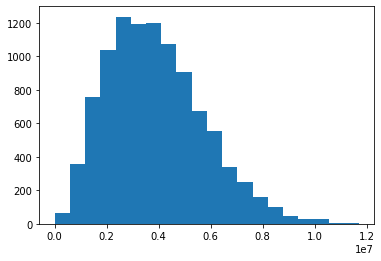

In [21]:
plt.hist(total_sims, bins=20)

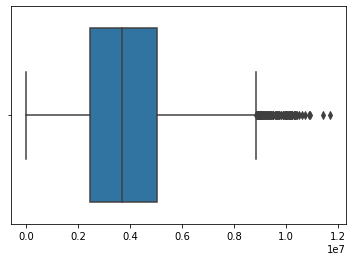

In [22]:
sns.boxplot(x=total_sims)

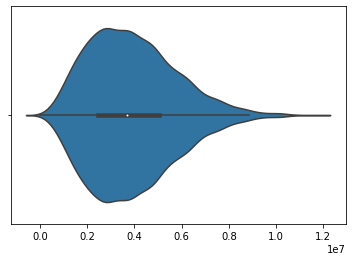

In [23]:
sns.violinplot(x=total_sims)

In [27]:
total_sims = pd.Series(total_sims)
total_sims.describe()

count    1.000000e+04
mean     3.884033e+06
std      1.849535e+06
min      0.000000e+00
25%      2.475000e+06
50%      3.695000e+06
75%      5.031250e+06
max      1.171000e+07
dtype: float64

In [28]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurments."""
    # Number of data points: n
    n = len(data)
    
    #x-data for the ECDF : x
    x = np.sort(data)
    #y-data for ecdf : y
    y= np.arange(1, n+1) / n
    return x, y

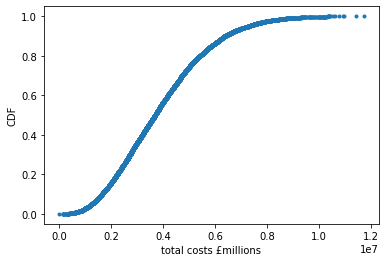

In [29]:
ts_x, ts_y = ecdf(total_sims)
plt.plot(ts_x, ts_y, marker='.', linestyle='none')
plt.xlabel('total costs £millions')
plt.ylabel('CDF')
plt.show()